In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import pickle


In [79]:
train_data = pd.read_excel("C:/Users/anura/Desktop/Anurag/Python Project/CODING_PRACTICE/Flight Dataset/Data_Train.xlsx")
train_data.dropna()
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [80]:
train_data['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [81]:
def newd(x):
    if x == 'New Delhi':
        return 'Delhi'
    else:
        return x

train_data['Destination'] = train_data['Destination'].apply(newd)
train_data['Source'] = train_data['Source'].apply(newd)

In [82]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [83]:
#just space

In [84]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month
train_data.drop('Date_of_Journey', inplace=True, axis=1)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [85]:
train_data['Dep_hour'] = pd.to_datetime(train_data["Dep_Time"], format='%H:%M').dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data["Dep_Time"], format='%H:%M').dt.minute
train_data.drop('Dep_Time', inplace=True, axis=1)

train_data['Arrival_hour'] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute
train_data.drop('Arrival_Time', inplace=True, axis=1)
train_data.head()

C:\Users\anura\AppData\Local\Temp\ipykernel_5228\2006743354.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_hour'] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour
C:\Users\anura\AppData\Local\Temp\ipykernel_5228\2006743354.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_min'] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [86]:
duration = list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i]):
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
duration_hour = []
duration_min = []

for i in duration:
    try:
        h,m = i.split()
        duration_hour.append(int(h[:-1]))
        duration_min.append(int(m[:-1]))
    except ValueError:
        duration_hour.append(0)
        duration_min.append(0)
        
train_data['Duration_hours'] = duration_hour
train_data['Duration_mins'] = duration_min
train_data.drop('Duration', inplace=True, axis=1)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,0,0
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,0,0


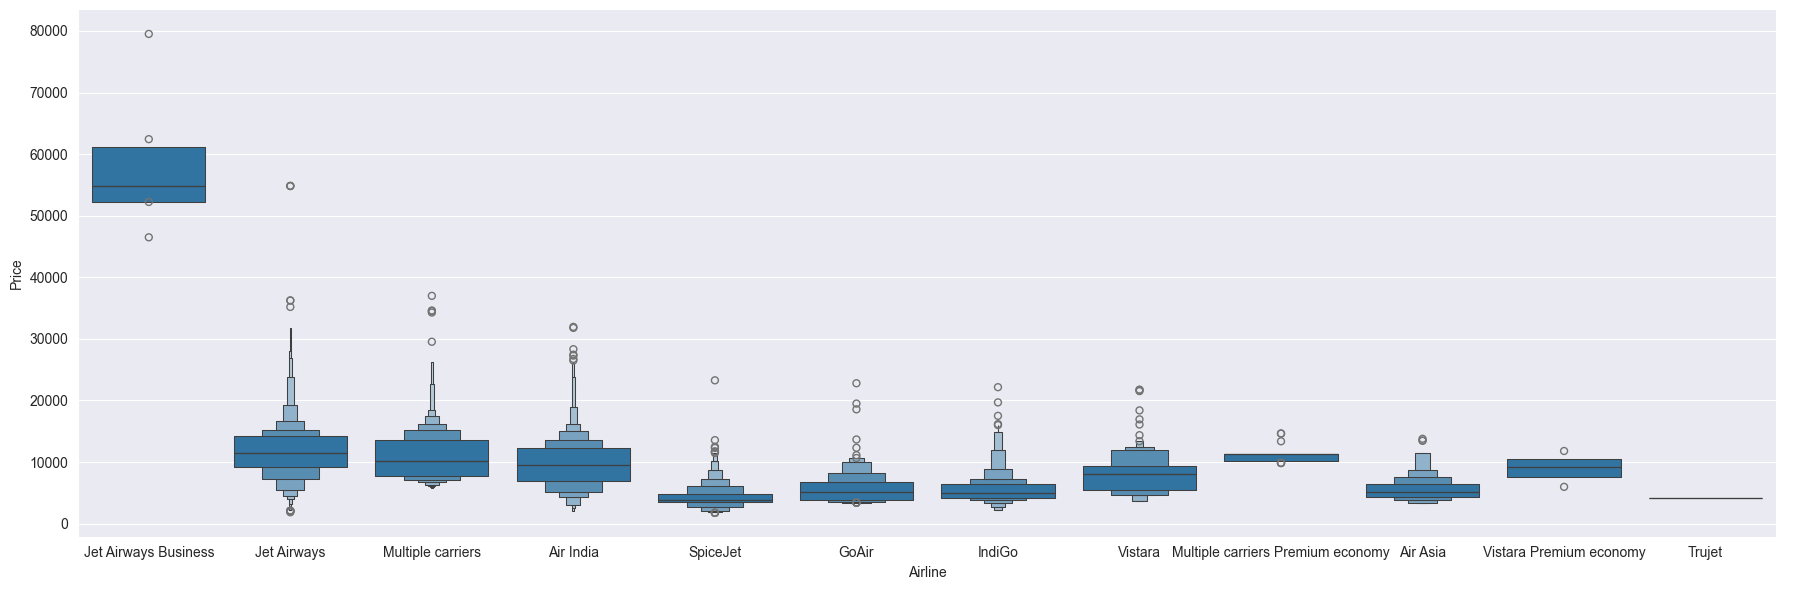

In [87]:
sns.catplot(x ='Airline', y='Price',data=train_data.sort_values('Price',ascending=False), kind='boxen', aspect=3, height=6)

In [88]:
airline = train_data['Airline']
airline = pd.get_dummies(airline, drop_first=True)

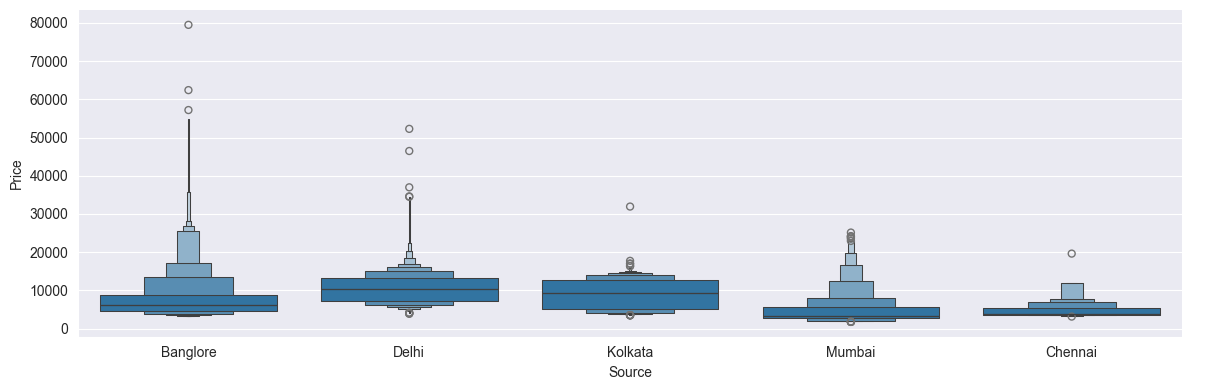

In [89]:
sns.catplot(x='Source', y='Price', data=train_data.sort_values('Price', ascending=False), kind='boxen', aspect=3, height=4)

In [90]:
source = train_data['Source']
source = pd.get_dummies(source, drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


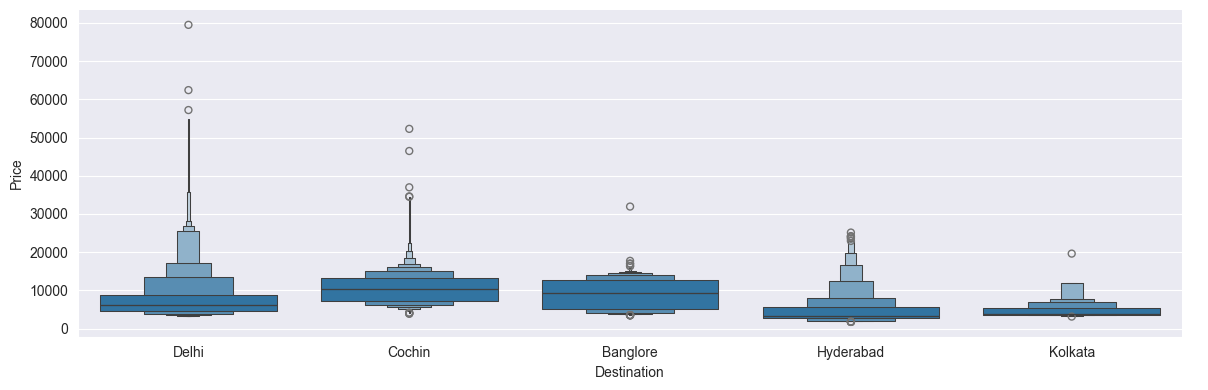

In [91]:
sns.catplot(x='Destination', y='Price', data=train_data.sort_values('Price',ascending=False), kind='boxen', aspect=3, height=4)

In [92]:
destination = train_data['Destination']
destination = pd.get_dummies(destination, drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata
0,False,True,False,False
1,False,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False


In [93]:
train_data.drop(['Route', 'Additional_Info'],inplace= True, axis=1)

In [94]:
train_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [95]:
train_data['Total_Stops'] = train_data['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

train_data.head()

C:\Users\anura\AppData\Local\Temp\ipykernel_5228\525604995.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Total_Stops'] = train_data['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,22,20,1,10,0,0
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,15,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,30,0,0
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,16,50,21,35,0,0


In [96]:
print(airline.shape)
print(source.shape)
print(destination.shape)
print(train_data.shape)

(10683, 11)
(10683, 4)
(10683, 4)
(10683, 13)


In [97]:
data_train = pd.concat([train_data, airline, source, destination], axis=1)
data_train.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,0.0,3897,24,3,22,20,1,10,0,0,...,False,False,False,False,False,False,False,True,False,False
1,2.0,7662,1,5,5,50,13,15,0,0,...,False,False,False,False,True,False,False,False,False,False
2,2.0,13882,9,6,9,25,4,25,19,0,...,False,False,False,True,False,False,True,False,False,False
3,1.0,6218,12,5,18,5,23,30,0,0,...,False,False,False,False,True,False,False,False,False,False
4,1.0,13302,1,3,16,50,21,35,0,0,...,False,False,False,False,False,False,False,True,False,False


In [98]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata'],
      dtype='object')

In [99]:
X = data_train.drop('Price', axis=1).dropna()
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,0.0,24,3,22,20,1,10,0,0,False,...,False,False,False,False,False,False,False,True,False,False
1,2.0,1,5,5,50,13,15,0,0,True,...,False,False,False,False,True,False,False,False,False,False
2,2.0,9,6,9,25,4,25,19,0,False,...,False,False,False,True,False,False,True,False,False,False
3,1.0,12,5,18,5,23,30,0,0,False,...,False,False,False,False,True,False,False,False,False,False
4,1.0,1,3,16,50,21,35,0,0,False,...,False,False,False,False,False,False,False,True,False,False


In [100]:
y = data_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [101]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,22,20,1,10,0,0
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,15,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,30,0,0
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,16,50,21,35,0,0


In [102]:
# plt.figure(figsize=(10,10))
# sns.heatmap(train_data, cmap='viridis', annot=True)

In [103]:
print(X.shape, y.shape)

(10682, 28) (10683,)


In [104]:
if y.shape[0] > X.shape[0]:
  y = y.iloc[:-1]

reg = ExtraTreesRegressor()
reg.fit(X, y)
print(reg.feature_importances_)


[2.16798647e-01 2.10508270e-01 5.98250465e-02 7.53424711e-02
 4.82721744e-02 5.78008871e-02 4.34408662e-02 1.17041158e-02
 1.10478503e-05 1.49420113e-02 2.41510149e-03 9.62808401e-03
 1.20060217e-01 3.64903792e-02 1.61757526e-02 5.99470005e-04
 5.04902809e-03 1.86682494e-04 4.91808997e-03 8.93222042e-05
 1.04167612e-03 1.32988848e-02 4.38191944e-03 8.92063059e-03
 1.45160740e-02 1.48732256e-02 7.63646669e-03 1.07345884e-03]


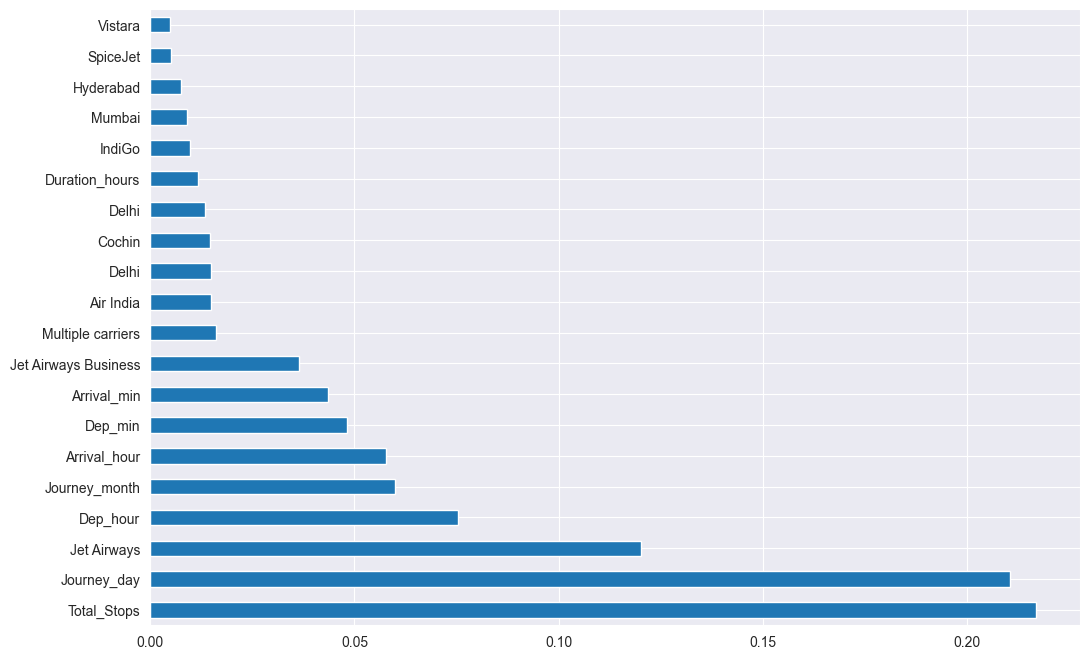

In [105]:
plt.figure(figsize= (12,8))
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [107]:
n_estimators = [int(x) for x in np.linspace(start= 100, stop= 1200, num = 12)]
max_features = [1, 2, 3, len(X.columns)]
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

rf_random = RandomizedSearchCV(estimator= RandomForestRegressor(), param_distributions=random_grid, scoring= 'neg_mean_squared_error', n_iter= 10, cv= 5, verbose= 1, random_state=42, n_jobs= 1, error_score='raise')
rf_random.fit(X_train, y_train)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': [1, 2, 3, 28], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': [1, 2, 3, 28],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [108]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 28,
 'max_depth': 30}

In [109]:
prediction = rf_random.predict(X_test)

<Figure size 800x800 with 0 Axes>

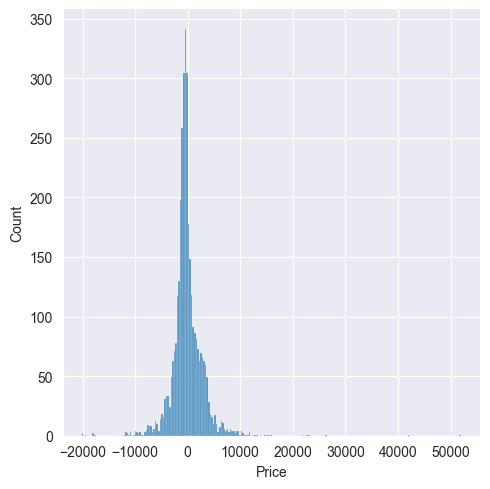

In [110]:
plt.figure(figsize= (8,8))
sns.displot(y_test-prediction)
plt.show()

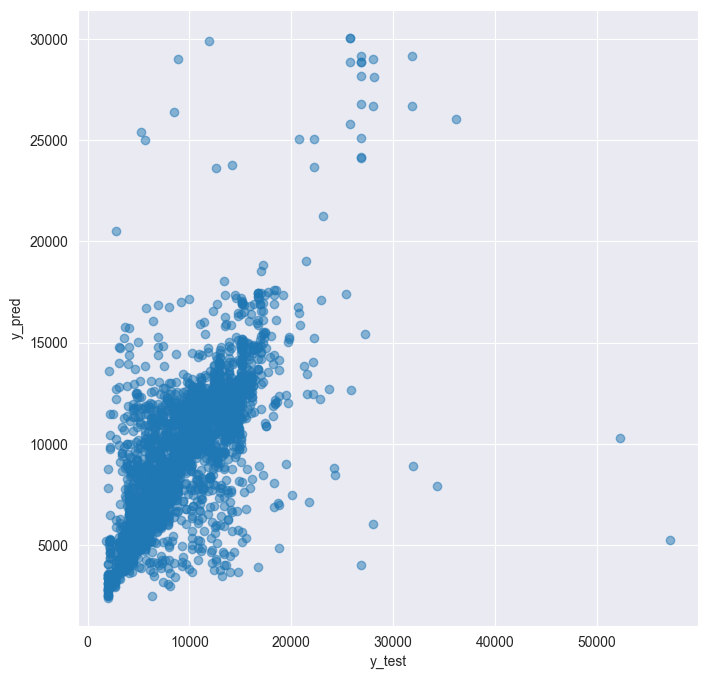

In [111]:
plt.figure(figsize= (8,8))
plt.scatter(y_test, prediction, alpha= 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [112]:
print('r2 score: ', metrics.r2_score(y_test, prediction))

r2 score:  0.5261509270796745


In [115]:
file = open('C:/Users/anura/Desktop/Anurag/Python Project/CODING_PRACTICE/flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)